Link Google Colab:

[Modelos de Simulacion](https://colab.research.google.com/drive/1aCLDtH-CdL1TW5VfFzVfh7udM3lMKx53?usp=sharing)

In [1]:
from scipy.stats import binom, poisson, norm
import numpy as np
import matplotlib.pyplot as plt

---
Generar una muestra aleatoria de 100 elementos que siga una distribución binomial B(20, 0.25). 

In [2]:
binom.rvs(n=20, p=0.25, size=100)


array([ 5,  4,  5,  4,  3,  1,  6,  3,  6,  6,  7,  6,  7,  5,  6,  5,  4,
        3,  4,  3,  4,  4,  4,  6,  3,  3,  5,  3,  9,  7,  5,  9,  4,  5,
        6,  6,  5,  6,  3,  4,  6,  3,  8,  2,  5,  5,  4, 12,  5,  3,  7,
        6,  3,  7,  4,  2,  4,  6,  4,  6,  7,  6,  6,  3,  6,  3,  2,  6,
        3, 10,  7,  1,  4,  2,  7,  7,  5,  3,  4,  5,  9,  2,  4,  3,  4,
        1,  6,  4,  6,  7,  3,  2,  7,  3,  1,  6,  4,  5,  4,  1])

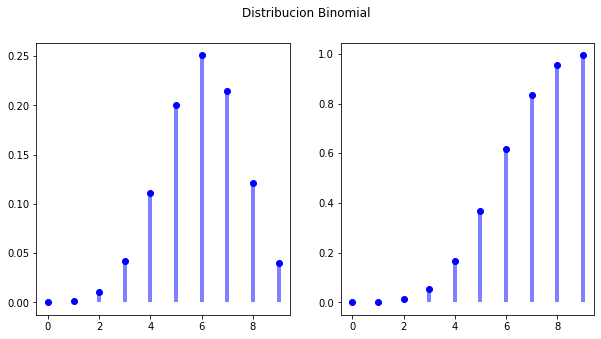

E(X) = 6.0
Var(X) = 2.4000000000000004


In [3]:
n, p = 10, 0.6
# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
x = np.arange(0, n)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1,2,1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=6, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=4, alpha=0.5)

ax = fig.add_subplot(1,2,2)
ax.plot(x, binom.cdf(x, n, p), 'bo', ms=6, label='binom cdf')
ax.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=4, alpha=0.5)

fig.suptitle('Distribucion Binomial')
plt.show()

print("E(X) = {m}".format(m=binom.stats( n, p, moments='m')))
print("Var(X) = {v}".format(v=binom.stats( n, p, moments='v')))


---
Muestra aleatoria con distribución de Poisson


In [4]:
# poisson.cdf(0, mu=3)

poisson.rvs(mu=3, size=20)


array([3, 4, 0, 1, 2, 4, 3, 4, 3, 0, 3, 4, 2, 2, 1, 5, 0, 0, 2, 3])

---
Ajustar muestra aleatoria a distribución de Poisson

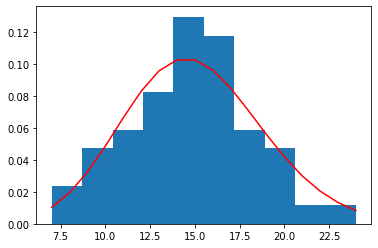

[0.01037029 0.0194443  0.03240717 0.04861075 0.06628739 0.08285923
 0.09560681 0.10243587 0.10243587 0.09603362 0.08473555 0.07061296
 0.05574707 0.04181031 0.0298645  0.02036216 0.01327967 0.00829979]
[ 2  4  5  7 11 10  5  4  1  1]


In [5]:
sample = [ 14, 7, 13, 16, 16, 13, 14, 17, 15, 16, 13, 15, 10, 15, 16, 14, 12, 17, 14, 12, 13, 20, 8, 17, 19, 11, 12, 17, 9, 18, 20, 10, 18, 15, 13, 16, 24, 18, 16, 18, 12, 14, 20, 15, 10, 13, 21, 13, 15, 18]
mu= 15
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

data_poisson = poisson.pmf(x, mu)
_ = plt.plot(x, data_poisson, 'r-')
_ = plt.hist(sample, density=1)

plt.show()
print(data_poisson)
histo = np.histogram(sample,bins=10)
print(histo[0])





Prueba de bondad normal

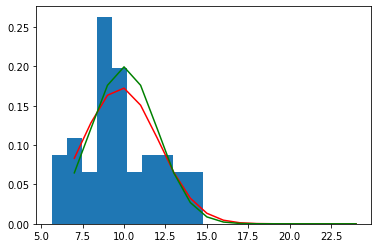

(9.78602, 2.3033562511257353)


In [6]:
sample = [ 
9.400,	8.620,	9.346,	13.323,	7.112,	13.466,	5.764,	8.974,	9.831,	10.056,
7.445,	6.619,	9.260,	6.775,	8.306,	5.633,	8.864,	13.944,	8.952,	9.355,
10.489,	6.306,	12.685,	11.078,	6.957,	9.532,	9.192,	11.731,	11.350,	14.389,
12.553,	8.045,	9.829,  11.804,	9.274,	12.190,	10.270,	14.751,	9.237,	6.515,
12.397,	8.453,	9.628,	13.838,	9.935,	7.827,	9.269,	8.690,	11.515,	8.527
]

params = norm.fit(sample)
pdf_fitted = norm.pdf(x, loc=params[0], scale=params[1])
pdf_bondad = norm.pdf(x, loc= 10, scale=2)
_ = plt.plot(x, pdf_fitted, 'r-')
_ = plt.plot(x, pdf_bondad, 'g-')
_ = plt.hist(sample, density=1)
plt.show()
print(params)